In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import cma

Done


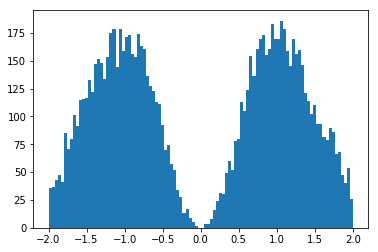

In [2]:
n_photons = 2
state1 = np.zeros(n_photons)
state1[0] = 1.
state2 = np.zeros(n_photons)
state2[0] = 1.
state3 = np.zeros(n_photons)
state3[1] = 1.
state = np.kron(state2, state3)
state = np.kron(state1, state)
data = meas_X_theta(state, 0., 3, n_photons)
plt.hist(data[:,2], bins=100)
print('Done')

# Initialization

In [3]:
n_photons = 20
# 1
num_layers = 5
vacuum_state1 = np.zeros(n_photons)
vacuum_state1[0] = 1.
init_state = vacuum_state1

In [4]:
init_state

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
def circuit(state, params, n_photons):
    state_ = state
    for i in range(num_layers):
        gate1 = N_phase_gate(params[7*i], 4, 1, 1, n_photons) 
        gate2 = D_gate(params[7*i+1], params[7*i+2], 1, 1, n_photons)
        gate3 = R_gate(params[7*i+3], 1, 1, n_photons) 
        gate4 = S_gate(params[7*i+4], params[7*i+5], 1, 1, n_photons)
        gate5 = R_gate(params[7*i+6], 1, 1, n_photons)
        state_ = np.einsum('jk,k->j', gate1, state_)
        state_ = np.einsum('jk,k->j', gate2, state_)
        state_ = np.einsum('jk,k->j', gate3, state_)
        state_ = np.einsum('jk,k->j', gate4, state_)
        state_ = np.einsum('jk,k->j', gate5, state_)
    X = meas_X(state_, 1, n_photons)
    P = meas_P(state_, 1, n_photons)
    return X, P, state_

def loss_xy(x1, p1):
    H = np.zeros(x1.shape[0], dtype=np.float32)
    dimension = x1.shape[0]
    H = 0.07*x1**4/2. - x1**2/2. + 0.8*p1**2/2.
    return np.mean(H) + np.std(H)

In [6]:
def func_to_opt(params):
    X, P, _ = circuit(init_state, params, n_photons)
    return loss_xy(X, P)

In [7]:
init_params = np.random.uniform(size=7*num_layers)
es = cma.CMAEvolutionStrategy(init_params, 0.4)

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 35 (seed=306824, Tue Jan 28 10:28:25 2020)


In [ ]:
es.optimize(func_to_opt,iterations=200)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 5.358604676873620e-01 1.0e+00 3.74e-01  4e-01  4e-01 0:09.4
    2     28 5.670433329450765e-01 1.1e+00 3.52e-01  3e-01  4e-01 0:18.2
    3     42 5.946240749626062e-01 1.1e+00 3.37e-01  3e-01  3e-01 0:27.8
    4     56 5.736371391868104e-01 1.1e+00 3.29e-01  3e-01  3e-01 0:37.5
    5     70 5.879725532275684e-01 1.1e+00 3.24e-01  3e-01  3e-01 0:50.0
    6     84 5.780951459975646e-01 1.1e+00 3.21e-01  3e-01  3e-01 1:04.2
    7     98 5.838865371615276e-01 1.1e+00 3.22e-01  3e-01  3e-01 1:18.3
    8    112 6.123374419327758e-01 1.1e+00 3.26e-01  3e-01  3e-01 1:32.8
    9    126 5.779792148178241e-01 1.2e+00 3.28e-01  3e-01  3e-01 1:45.4
   10    140 5.701809866615613e-01 1.2e+00 3.28e-01  3e-01  3e-01 1:57.2
   11    154 5.795481865872180e-01 1.2e+00 3.33e-01  3e-01  3e-01 2:09.6
   12    168 5.744487919115044e-01 1.2e+00 3.41e-01  3e-01  4e-01 2:21.3
   13    182 5.629610711500307e-01 1.2e+00 3.43e-01 

In [ ]:
params = es.result_pretty().xbest
final_state = circuit(init_state, params, n_photons)[2]

In [ ]:
print(*final_state)

In [ ]:
print("Initial_state")
final_state = final_state.reshape(final_state.shape[0],1)
rho = np.kron(final_state,final_state.conj().T)
xvec = np.linspace(-4,4,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()

In [ ]:
params

In [ ]:
n_photons = 20
# 1
vacuum_state1 = np.zeros(n_photons)
vacuum_state1[1] = 1.
target_state = vacuum_state1
data = sim_mes_xp(target_state, 1, n_photons)
print('final wanted loss ------- ', loss_xy(data[:,0], data[:, 1]))

In [ ]:
final_state = final_state.reshape(final_state.shape[0], 1)
target_state = target_state.reshape(target_state.shape[0], 1)
rho = final_state @ final_state.conj().T
rho_target = target_state @ target_state.conj().T
fidelity(rho, rho_target)